# AI Project

## Initialization and starting Functions

In [157]:
import random
import math
from tabulate import tabulate
import matplotlib.pyplot as plt
import csv

In [158]:
MAX_COURSES_PER_PROFESSOR = 3
MAX_COURSES_PER_SECTION = 5
SLOTS = {0: "8:30 - 9:50", 1: "10:00 - 11:20", 2: "11:30 - 12:50", 3: "1:00 - 2:20", 4: "2:30 - 3:50", 5: "4:00 - 5:20"}

# Days of the week
DAYS = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday"}
# Subjects
courses = {0: "OOP", 1: "DSA", 2: "Programming Funcdamentals", 3: "Data Base Systems", 4: "Computer Networks", 5:"Web Development", 6: "Machine Learning"}
#, 6: "Machine Learning", 7: "Parallel Computing", 8: "Operating Systems", 9: "Programming Funcdamentals"}

professors = {0: "Ali", 1: "Ahmed Raza", 2: "Saad Salman", 3: "Fatima Khan", 4: "Sana Ahmed", 5: "Usman Ali", 6: "Ayesha Khan"}

sections = {0: "A", 1: "B", 2: "C", 3: "D", 4:"E", 5:"F"}
rooms = {
    0: "C-201", 1: "Mehran Lab", 2: "C-206", 3: "Karakoram I", 4: "C-304",
    5: "Margalla I", 6: "C-401", 7: "Karakoram II", 8: "C-404",
    9: "Karakoram III", 10: "C-509", 11: "Margalla II", 12: "C-605", 13: "Margalla III",
    14: "C-703", 15: "AIMS Lab", 16: "C-402", 17: "K-Lab"}

# Room types
ROOM_TYPES = {
    0: 60, 1: 120, 2: 60, 3: 120, 4: 60, 5: 120, 6: 60, 7: 120,
    8: 60, 9: 120, 10: 60, 11: 120, 12: 60, 13: 120, 14: 60,
    15: 120, 16: 60, 17: 120
}

In [159]:
numOfCourse = len(courses)
numOfDays = len(DAYS)
numOfProfessors = len(professors)
numOfSection = len(sections)
numOfRooms = len(rooms)
numOfSlots = len(SLOTS)

bits_for_course = math.ceil(math.log2(numOfCourse))
bits_for_days = math.ceil(math.log2(numOfDays))
bits_for_professors = math.ceil(math.log2(numOfProfessors))
bits_for_section = math.ceil(math.log2(numOfSection))
bits_for_rooms = math.ceil(math.log2(numOfRooms))
bits_for_slots = math.ceil(math.log2(numOfSlots))

In [160]:
def generateCoursesList():
  course_data = []
  for course_id, _ in courses.items():
        theory_lab = random.randint(0, 1)
        section_bin = random.choice(list(sections.keys()))
        section = sections[section_bin]
        section_strength = random.randint(20, 80)
        course_data.append({
            "CourseID" : course_id,
            "Theory_Lab" : theory_lab,
            "Section" : section_bin,
            "Strength" : section_strength
        })

  count = 0
  for course in course_data:
    if course["Theory_Lab"] == 1:
        count += 1

  if count == 0:
    course_data[0]["Theory_Lab"] = 1

  return course_data

In [161]:
def generate_chromosome():
    chromosome = ""
    for _ in courses.items():

        professor_index = random.choice(list(professors.keys()))
        first_lecture_day_index = random.choice(list(DAYS.keys()))
        first_lecture_timeslot_index = random.choice(list(SLOTS.keys()))
        first_room_index = random.choice(list(rooms.keys()))

        second_lecture_day_index = random.choice(list(DAYS.keys()))
        second_lecture_timeslot_index = random.choice(list(SLOTS.keys()))
        second_room_index = random.choice(list(rooms.keys()))

        #print(professor_index, first_lecture_day_index, first_lecture_timeslot_index, first_room_index, second_lecture_day_index, second_lecture_timeslot_index, second_room_index)

        # Convert the indexes into binary strings with fixed lengths
        professor_bin = format(professor_index, f'0{bits_for_professors}b').zfill(bits_for_professors)
        first_lecture_day_bin = format(first_lecture_day_index, f'0{bits_for_days}b').zfill(bits_for_days)
        first_lecture_timeslot_bin = format(first_lecture_timeslot_index, f'0{bits_for_slots}b').zfill(bits_for_slots)
        first_room_bin = format(first_room_index, f'0{bits_for_rooms}b').zfill(bits_for_rooms)
        second_lecture_day_bin = format(second_lecture_day_index, f'0{bits_for_days}b').zfill(bits_for_days)
        second_lecture_timeslot_bin = format(second_lecture_timeslot_index, f'0{bits_for_slots}b').zfill(bits_for_slots)
        second_room_bin = format(second_room_index, f'0{bits_for_rooms}b').zfill(bits_for_rooms)

        #print(professor_bin, first_lecture_day_bin, first_lecture_timeslot_bin, first_room_bin, second_lecture_day_bin, second_lecture_timeslot_bin, second_room_bin)

        chromosome += "".join([
            professor_bin, first_lecture_day_bin, first_lecture_timeslot_bin, first_room_bin,
            second_lecture_day_bin, second_lecture_timeslot_bin, second_room_bin
        ])

    return chromosome

In [162]:
def initialize_population(population_size):
    return [generate_chromosome() for _ in range(population_size)]

In [163]:
def decode_chromosome(chromosome, courseList):
    decoded_chromosome = []
    chromosome_length = len(chromosome)

    bits_per_parameter = {
        "ProfessorID": bits_for_professors,
        "FirstLectureDay": bits_for_days,
        "FirstLectureTimeslot": bits_for_slots,
        "FirstRoomID": bits_for_rooms,
        "SecondLectureDay": bits_for_days,
        "SecondLectureTimeslot": bits_for_slots,
        "SecondRoomID": bits_for_rooms
    }
    current_index = 0
    for course in courseList:
        flag = False
        decoded_course = {}
        decoded_course["Course"] = courses[course["CourseID"]]
        decoded_course["Theory_Lab"] = "Theory" if course["Theory_Lab"] == 0 else "Lab"

        if decoded_course["Theory_Lab"] == "Lab":
          flag = True

        decoded_course["Section"] = sections[course["Section"]]
        decoded_course["Section Strength"] = course["Strength"]

        # Iterate over each parameter in bits_per_parameter
        for parameter, num_bits in bits_per_parameter.items():
            bit_sequence = chromosome[current_index:current_index + num_bits]
            parameter_value = int(bit_sequence, 2)
            if parameter == "ProfessorID":
                decoded_course["Professor"] = professors[parameter_value]
            elif parameter == "FirstLectureDay" or parameter == "SecondLectureDay":
                decoded_course[parameter] = DAYS[parameter_value]
            elif parameter == "FirstLectureTimeslot" or parameter == "SecondLectureTimeslot":
                if parameter == "FirstLectureTimeslot":
                  T1 = parameter_value
                elif parameter == "SecondLectureTimeslot":
                  T2 = parameter_value

                decoded_course[parameter] = SLOTS[parameter_value]
            elif parameter == "FirstRoomID" or parameter == "SecondRoomID":
                decoded_course[parameter.replace("ID", "")] = rooms[parameter_value]
            current_index += num_bits

        if flag == True:
          #print("LAB")
          if T1 > T2:
            #print(T1, T2)
            temp = decoded_course["FirstLectureTimeslot"]
            decoded_course["FirstLectureTimeslot"] = decoded_course["SecondLectureTimeslot"]
            decoded_course["SecondLectureTimeslot"] = temp

        decoded_chromosome.append(decoded_course)

    return decoded_chromosome


## Fitness Function

In [164]:
def fitness_function(chromosome, course_data):
  conflicts = 0

  professor_schedule = {}
  section_schedule = {}
  room_schedule = {}

  hard_constraint = 10
  soft_constraint = 1

  index = 0
  i = 0

  last_professor = None
  last_timeslot = None

  for c in course_data:

      course = c["CourseID"]
      theory_lab = c["Theory_Lab"]
      section = c["Section"]
      section_strength = c["Strength"]

      #professor, day, timeslot, room, day2, timeslot2, room2 = gene ## <<<<<<<<<<<<

      professor = chromosome[index:index+bits_for_professors]
      index += bits_for_professors
      day = chromosome[index:index+bits_for_days]
      index += bits_for_days
      timeslot = chromosome[index:index+bits_for_slots]
      index += bits_for_slots
      room = chromosome[index:index+bits_for_rooms]
      index += bits_for_rooms
      day2 = chromosome[index:index+bits_for_days]
      index += bits_for_days
      timeslot2 = chromosome[index:index+bits_for_slots]
      index += bits_for_slots
      room2 = chromosome[index:index+bits_for_rooms]
      index += bits_for_rooms
      #print(i)
      i+=1
      if int(professor, 2) >= numOfProfessors:
        #print("Prof")
        conflicts += 1000

      if int(day, 2) >= numOfDays:
        #print("Days", day)
        conflicts += 1000

      if int(timeslot, 2) >= numOfSlots:
        #print("slot")
        conflicts += 1000

      if int(room, 2) >= numOfRooms:
        #print("room")
        conflicts += 1000

      if int(day2, 2) >= numOfDays:
        #print("Days 2", day2)
        conflicts += 1000

      if int(timeslot2, 2) >= numOfSlots:
        #print("slot 2")
        conflicts += 1000

      if int(room2, 2) >= numOfRooms:
        #print("room 2")
        conflicts += 1000


      # Classes can only be scheduled in free classrooms
      if room in room_schedule:
            if day in room_schedule[room]:
                if timeslot in room_schedule[room][day]:
                    conflicts += hard_constraint
                else:
                    room_schedule[room][day].add(timeslot)
            else:
                room_schedule[room][day] = set([timeslot])
      else:
            room_schedule[room] = {day: set([timeslot])}

      # A classroom should be big enough to accommodate the section
      if room in ROOM_TYPES:
          room_capacity = ROOM_TYPES[room]
          if section_strength > room_capacity:
              conflicts += hard_constraint

          if section_strength <= 60 and room_capacity > 60:
              conflicts += 5

      # A professor should not be assigned two different lectures at the same time
      if professor in professor_schedule:
          if day in professor_schedule[professor]:
              if timeslot in professor_schedule[professor][day]:
                  conflicts += hard_constraint
              else:
                  professor_schedule[professor][day].add(timeslot)
          else:
              professor_schedule[professor][day] = set([timeslot])
      else:
          professor_schedule[professor] = {day: set([timeslot])}

      if section in section_schedule:
          if day in section_schedule[section]:
              if timeslot in section_schedule[section][day]:
                  conflicts += hard_constraint  # Section already assigned to another room at this timeslot
              else:
                  section_schedule[section][day].add(timeslot)
          else:
              section_schedule[section][day] = set([timeslot])
      else:
          section_schedule[section] = {day: set([timeslot])}

      # No professor can teach more than 3 courses
      if list(professor_schedule.keys()).count(professor) > 3:
          conflicts += hard_constraint

      # No section can have more than 5 courses in a semester
      if list(section_schedule.keys()).count(section) > 5:
          conflicts += hard_constraint

      # No professor can teach more than 3 courses
      if sum(1 for day_schedule in professor_schedule.get(professor, {}).values() for _ in day_schedule) > 3:
          conflicts += hard_constraint

      # No section can have more than 5 courses in a semester
      if sum(1 for day_schedule in section_schedule.get(section, {}).values() for _ in day_schedule) > 5:
          conflicts += hard_constraint

      # Each course would have two lectures per week not on the same or adjacent days
      if theory_lab == 0:  # Theory class
          if int(day, 2) == int(day2, 2) or (abs(int(day, 2) - int(day2, 2))==1):
              conflicts += hard_constraint  # Lectures scheduled on the same or adjacent days for theory class
      elif theory_lab == 1:  # Lab class
          if day != day2:
              conflicts += hard_constraint # Lab is on different days

      # Lab lectures should be conducted in two consecutive slots
      if theory_lab == 1:  # Lab class
          if int(timeslot, 2) >= 4 and int(timeslot, 2) >= 4:
              if abs(int(timeslot, 2) - int(timeslot2, 2)) != 1:
                conflicts += hard_constraint
          elif int(timeslot, 2) < 4 and int(timeslot, 2) < 4:
              if abs(int(timeslot, 2) - int(timeslot2, 2)) != 1:
                conflicts += hard_constraint
          else:
              conflicts += hard_constraint

      # Lab should have both classes in same room
      if theory_lab == 1:
        if room != room2:
          conflicts += hard_constraint

      if day2:
        if room2 in room_schedule:
          if day2 in room_schedule[room2]:
              if timeslot2 in room_schedule[room2][day2]:
                  conflicts += hard_constraint  # Second lecture's room already booked
              else:
                  room_schedule[room2][day2].add(timeslot2)
          else:
              room_schedule[room2][day2] = set([timeslot2])
        else:
          room_schedule[room2] = {day2: set([timeslot2])}

        if room2 in ROOM_TYPES:
          room_capacity = ROOM_TYPES[room2]
          if section_strength > room_capacity:
              conflicts += hard_constraint

        if professor in professor_schedule:
            if day2 in professor_schedule[professor]:
                if timeslot2 in professor_schedule[professor][day2]:
                    conflicts += hard_constraint  # Professor already teaching at this timeslot for the second lecture
                else:
                    professor_schedule[professor][day2].add(timeslot2)
            else:
                professor_schedule[professor][day2] = set([timeslot2])
        else:
            professor_schedule[professor] = {day2: set([timeslot2])}

        if section in section_schedule:
            if day2 in section_schedule[section]:
                if timeslot2 in section_schedule[section][day2]:
                    conflicts += hard_constraint  # Section already assigned to another room at this timeslot for the second lecture
                else:
                    section_schedule[section][day2].add(timeslot2)
            else:
                section_schedule[section][day2] = set([timeslot2])
        else:
            section_schedule[section] = {day2: set([timeslot2])}

      # >>>>>>>>>>>>>> Soft Constraints Below <<<<<<<<<<<<<<<<<<

      ## Theories in Morning and Lab in Afternoon
      if theory_lab == 0 and int(timeslot, 2) >= 4:
            conflicts += soft_constraint

      if theory_lab == 1 and int(timeslot, 2) < 4:
            conflicts += soft_constraint

      # Same class room across the week
      if theory_lab == 0:
        if room != room2:
          conflicts += soft_constraint

      '''
      # Longer blocks of continuous teaching time for professors
        if professor == last_professor:
            if int(day, 2) == int(last_day, 2) and int(timeslot, 2) != (int(last_timeslot, 2) + 1) % numOfSlots:
                conflicts += soft_constraint
        else:
            last_professor = professor
            last_timeslot = timeslot
            last_day = day
      '''





  return -conflicts

## Selection

In [165]:
def selection(population, courseList):
    sorted_population = sorted(population, key=lambda ind: fitness_function(ind, courseList), reverse=True)
    selected_individuals = sorted_population[:2]
    return selected_individuals[0], selected_individuals[1]

## Crossover

In [166]:
def crossover(chromosome1, chromosome2):
    crossover_point = random.randint(1, len(chromosome1) - 1)

    offspring1 = chromosome1[:crossover_point] + chromosome2[crossover_point:]
    offspring2 = chromosome2[:crossover_point] + chromosome1[crossover_point:]

    return offspring1, offspring2

def crossover_chromosomes(chromosome1, chromosome2):
    choice = 0

    if choice == 1:
      chromosome_length = len(chromosome1)
      crossover_points = sorted(random.sample(range(1, chromosome_length), 2))

      offspring1 = chromosome1[:crossover_points[0]] + chromosome2[crossover_points[0]:crossover_points[1]] + chromosome1[crossover_points[1]:]
      offspring2 = chromosome2[:crossover_points[0]] + chromosome1[crossover_points[0]:crossover_points[1]] + chromosome2[crossover_points[1]:]
    else:
      crossover_point = random.randint(1, len(chromosome1) - 1)

      offspring1 = chromosome1[:crossover_point] + chromosome2[crossover_point:]
      offspring2 = chromosome2[:crossover_point] + chromosome1[crossover_point:]

    return offspring1, offspring2

## Mutation

In [167]:
def mutate(chromosome, mutation_rate):
    mutated_chromosome = ""
    index = 0

    while index < len(chromosome):
        # Extract genes for each aspect from the chromosome
        professor_gene = chromosome[index:index + bits_for_professors]
        index += bits_for_professors
        day_gene = chromosome[index:index + bits_for_days]
        index += bits_for_days
        timeslot_gene = chromosome[index:index + bits_for_slots]
        index += bits_for_slots
        room_gene = chromosome[index:index + bits_for_rooms]
        index += bits_for_rooms

        day_gene2 = chromosome[index:index + bits_for_days]
        index += bits_for_days
        timeslot_gene2 = chromosome[index:index + bits_for_slots]
        index += bits_for_slots
        room_gene2 = chromosome[index:index + bits_for_rooms]
        index += bits_for_rooms

        # Check if mutation occurs for each gene
        mutated_professor_gene = mutate_gene(professor_gene, mutation_rate, "P")

        mutated_day_gene = mutate_gene(day_gene, mutation_rate, "D")
        mutated_timeslot_gene = mutate_gene(timeslot_gene, mutation_rate, "T")
        mutated_room_gene = mutate_gene(room_gene, mutation_rate, "R")

        mutated_day_gene2 = mutate_gene(day_gene2, mutation_rate, "D")
        mutated_timeslot_gene2 = mutate_gene(timeslot_gene2, mutation_rate, "T")
        mutated_room_gene2 = mutate_gene(room_gene2, mutation_rate, "R")

        mutated_chromosome += mutated_professor_gene + mutated_day_gene + mutated_timeslot_gene + mutated_room_gene + mutated_day_gene2 + mutated_timeslot_gene2 + mutated_room_gene2

    return mutated_chromosome

def mutate_gene(gene, mutation_rate, choice):
    if random.random() < mutation_rate:
      if choice == "P":
          key = format(random.choice(list(professors.keys())), f'0{bits_for_professors}b').zfill(bits_for_professors)
          #print(key)
          mutated_gene = key
      elif choice == "D":
          key = format(random.choice(list(DAYS.keys())), f'0{bits_for_days}b').zfill(bits_for_days)
          #print(key)
          mutated_gene = key
      elif choice == "T":
          key = format(random.choice(list(SLOTS.keys())), f'0{bits_for_slots}b').zfill(bits_for_slots)
          #print(key)
          mutated_gene = key
      elif choice == "R":
          key = format(random.choice(list(rooms.keys())), f'0{bits_for_rooms}b').zfill(bits_for_rooms)
          #print(key)
          mutated_gene = key
    else:
        #print(gene)
        mutated_gene = gene

    return mutated_gene

## Genetic Algo Function

In [168]:


def genetic_algo(generations = 5000):
  population = initialize_population(100)
  courseList = generateCoursesList()

  mutation_rate = 0.6

  bestChromosome = population[0]
  bestFitnessHistory = []

  counter = 0
  prev_parent1 = []
  prev_parent2 = []

  def update_population(chromosome1, chromosome2, population):

    flag = False
    if chromosome1 not in population and fitness_function(chromosome1, courseList) >= fitness_function(chromosome2, courseList):
        population.append(chromosome1)
        flag = True

    elif chromosome2 not in population and fitness_function(chromosome1, courseList) < fitness_function(chromosome2, courseList):
        population.append(chromosome2)
        flag = True

    sorted_population = sorted(population, key=lambda x: fitness_function(x, courseList))
    updated_population = sorted_population[1:]

    if flag == False:
        chromosome = mutate(sorted_population[0], 0.2)
        updated_population.append(chromosome)

    return updated_population


  for i in range(generations):
    print("Run: ", i)

    #if i % 5000 == 0:
     # population.clear()
     # population = initialize_population(100)


    parent1, parent2 = selection(population, courseList)

    print("Parent1: ", fitness_function(parent1, courseList))
    print("Parent2: ", fitness_function(parent2, courseList))

    offspring1, offspring2 = crossover_chromosomes(parent1, parent2)

    population = update_population(offspring1, offspring2, population)

    print("Offspring1: ", fitness_function(offspring1, courseList))
    print("Offspring2: ", fitness_function(offspring2, courseList))

    if fitness_function(offspring1, courseList) == 0:
      print("Best Found!")
      return offspring1, fitness_function(offspring1, courseList), courseList

    if fitness_function(offspring2, courseList) == 0:
      print("Best Found!")
      return offspring2, fitness_function(offspring2, courseList), courseList

    child1 = mutate(offspring1, mutation_rate)
    child2 = mutate(offspring2, mutation_rate)

    print("child1: ", fitness_function(child1, courseList))
    print("child2: ", fitness_function(child2, courseList))

    print("\n")

    if fitness_function(child1, courseList) == 0:
      print("Best Found!")
      return child1, fitness_function(child1, courseList), courseList

    if fitness_function(child2, courseList) == 0:
      print("Best Found!")
      return child2, fitness_function(child2, courseList), courseList

    population = update_population(child1, child2, population)

    if parent1 == prev_parent1 and parent2 == prev_parent2:
        counter += 1
        if counter == 400:
            print("Removing Parents: ")
            population.remove(parent1)
            #population.remove(parent2)
            mutation_rate += 0.1
            counter = 0
    else:
        counter = 0
        prev_parent1 = parent1
        prev_parent2 = parent2

    sorted_pop = sorted(population, key=lambda x: fitness_function(x, courseList), reverse=True)
    best = sorted_pop[0]

    if fitness_function(best, courseList) > fitness_function(bestChromosome, courseList):
        bestChromosome = best

    bestFitnessHistory.append(fitness_function(bestChromosome, courseList))
    print('\n\n Best Currently: ',decode_chromosome(bestChromosome, courseList))
    print(fitness_function(bestChromosome, courseList), '\n')

  plt.plot(range(generations), bestFitnessHistory)
  plt.xlabel('Generation')
  plt.ylabel('Fitness')
  plt.title('Fitness over Generations')
  plt.show()
  #print("Not the Best, but the highest fitness is found!")
  return bestChromosome, fitness_function(bestChromosome, courseList), courseList



# Main Code

Streaming output truncated to the last 5000 lines.

Run:  1643
Parent1:  -35
Parent2:  -45
Offspring1:  -45
Offspring2:  -35
child1:  -125
child2:  -138




 Best Currently:  [{'Course': 'OOP', 'Theory_Lab': 'Theory', 'Section': 'B', 'Section Strength': 66, 'Professor': 'Ahmed Raza', 'FirstLectureDay': 'Thursday', 'FirstLectureTimeslot': '8:30 - 9:50', 'FirstRoom': 'C-404', 'SecondLectureDay': 'Tuesday', 'SecondLectureTimeslot': '1:00 - 2:20', 'SecondRoom': 'C-404'}, {'Course': 'DSA', 'Theory_Lab': 'Theory', 'Section': 'F', 'Section Strength': 70, 'Professor': 'Sana Ahmed', 'FirstLectureDay': 'Monday', 'FirstLectureTimeslot': '11:30 - 12:50', 'FirstRoom': 'Margalla II', 'SecondLectureDay': 'Wednesday', 'SecondLectureTimeslot': '1:00 - 2:20', 'SecondRoom': 'C-605'}, {'Course': 'Programming Funcdamentals', 'Theory_Lab': 'Theory', 'Section': 'B', 'Section Strength': 73, 'Professor': 'Fatima Khan', 'FirstLectureDay': 'Friday', 'FirstLectureTimeslot': '4:00 - 5:20', 'FirstRoom': 'C-509', 'S

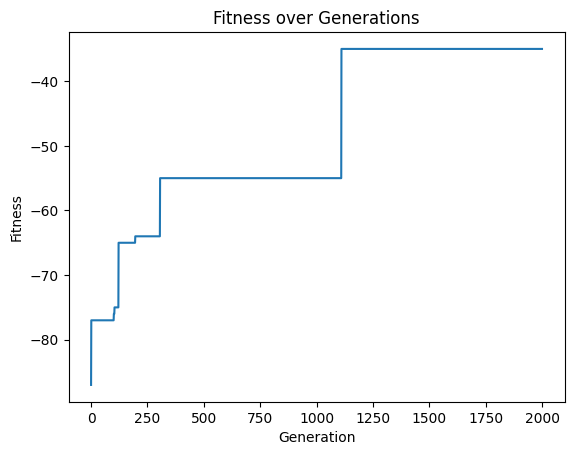




{'Course': 'OOP', 'Theory_Lab': 'Theory', 'Section': 'B', 'Section Strength': 66, 'Professor': 'Ahmed Raza', 'FirstLectureDay': 'Thursday', 'FirstLectureTimeslot': '8:30 - 9:50', 'FirstRoom': 'C-404', 'SecondLectureDay': 'Tuesday', 'SecondLectureTimeslot': '1:00 - 2:20', 'SecondRoom': 'C-404'}
{'Course': 'DSA', 'Theory_Lab': 'Theory', 'Section': 'F', 'Section Strength': 70, 'Professor': 'Sana Ahmed', 'FirstLectureDay': 'Monday', 'FirstLectureTimeslot': '11:30 - 12:50', 'FirstRoom': 'Margalla II', 'SecondLectureDay': 'Wednesday', 'SecondLectureTimeslot': '1:00 - 2:20', 'SecondRoom': 'C-605'}
{'Course': 'Programming Funcdamentals', 'Theory_Lab': 'Theory', 'Section': 'B', 'Section Strength': 73, 'Professor': 'Fatima Khan', 'FirstLectureDay': 'Friday', 'FirstLectureTimeslot': '4:00 - 5:20', 'FirstRoom': 'C-509', 'SecondLectureDay': 'Wednesday', 'SecondLectureTimeslot': '8:30 - 9:50', 'SecondRoom': 'K-Lab'}
{'Course': 'Data Base Systems', 'Theory_Lab': 'Theory', 'Section': 'C', 'Section 

In [153]:
best, fit, courseList = genetic_algo(2000)
print('\n\n')
genes = decode_chromosome(best, courseList)
for gene in genes:
  print(gene)
print(fitness_function(best, courseList))

In [154]:
genes = decode_chromosome(best, courseList)

print(tabulate(genes, headers="keys"))

Course                     Theory_Lab    Section      Section Strength  Professor    FirstLectureDay    FirstLectureTimeslot    FirstRoom     SecondLectureDay    SecondLectureTimeslot    SecondRoom
-------------------------  ------------  ---------  ------------------  -----------  -----------------  ----------------------  ------------  ------------------  -----------------------  ------------
OOP                        Theory        B                          66  Ahmed Raza   Thursday           8:30 - 9:50             C-404         Tuesday             1:00 - 2:20              C-404
DSA                        Theory        F                          70  Sana Ahmed   Monday             11:30 - 12:50           Margalla II   Wednesday           1:00 - 2:20              C-605
Programming Funcdamentals  Theory        B                          73  Fatima Khan  Friday             4:00 - 5:20             C-509         Wednesday           8:30 - 9:50              K-Lab
Data Base Systems      

In [169]:
with open('genes_output.csv', 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=genes[0].keys())
    writer.writeheader()
    for gene in genes:
        writer.writerow(gene)

print("Data saved to genes_output.csv")

Data saved to genes_output.csv
